In this notebook, you will learn how to make your first submission to the [Tabular Playground Series - Feb 2021 competition.](https://www.kaggle.com/c/tabular-playground-series-feb-2021)

# Make the most of this notebook!

You can use the "Copy and Edit" button in the upper right of the page to create your own copy of this notebook and experiment with different models. You can run it as is and then see if you can make improvements.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
        
input_path = Path('/kaggle/input/tabular-playground-series-feb-2021/')

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


# Read in the data files

In [2]:
train = pd.read_csv(input_path / 'train.csv', index_col='id')
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
test = pd.read_csv(input_path / 'test.csv', index_col='id')
display(test.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
5,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
15,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
16,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
17,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [4]:
submission = pd.read_csv(input_path / 'sample_submission.csv', index_col='id')
display(submission.head())

,target
id,
0,0.5
5,0.5
15,0.5
16,0.5
17,0.5


## We need to encode the categoricals.

There are different strategies to accomplish this, and different approaches will have different performance when using different algorithms. For this starter notebook, we'll use simple encoding.

In [5]:
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,3,0,4,2,8,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,1,0,0,0,1,1,0,4,0,5,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,0,0,0,2,1,3,0,1,2,13,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,0,0,0,2,1,3,0,4,6,10,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,0,1,0,0,1,1,0,4,2,5,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


## Pull out the target, and make a validation split

In [6]:
target = train.pop('target')
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

# How well can we do with a completely naive model?

We'll want any of our models to do (hopefully much!) better than this.

In [7]:
# Let's get a benchmark score
model_dummy = DummyRegressor(strategy='median')
model_dummy.fit(X_train, y_train)
y_dummy = model_dummy.predict(X_test)
score_dummy = mean_squared_error(y_test, y_dummy, squared=False)
print(f'{score_dummy:0.5f}')

0.88626


# Simple Linear Regression

A simple linear regression doesn't do better than our dummy regressor! (Alghouth, simple categorical encoding really doesn't make sense for this approach!)

In [8]:
# Simple Linear Regression
model_simple_linear = LinearRegression(fit_intercept=True) # data is not centered, we need an intercept!
model_simple_linear.fit(X_train, y_train)
y_simple_linear = model_simple_linear.predict(X_test)
score_simple_linear = mean_squared_error(y_test, y_simple_linear, squared=False)
print(f'{score_simple_linear:0.5f}')

0.86679


# This seems slow and repetative. Can we automate it a bit?

In [9]:
def plot_results(name, y, yhat, num_to_plot=10000, lims=(0,12), figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y[:num_to_plot], yhat[:num_to_plot])
    plt.plot(lims, lims)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

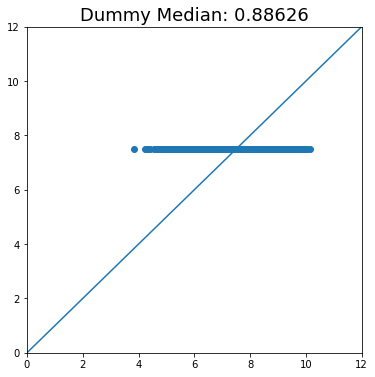

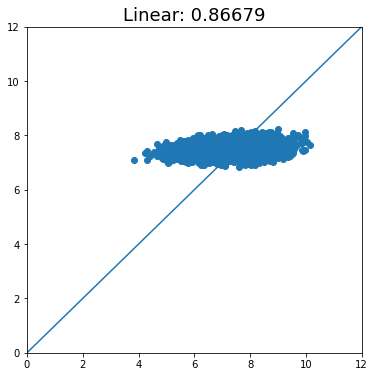

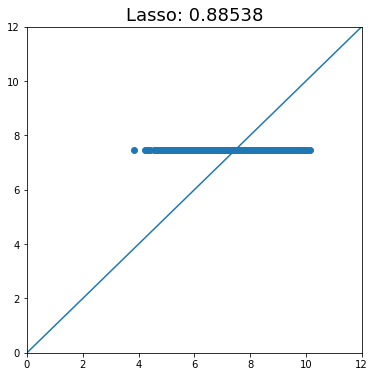

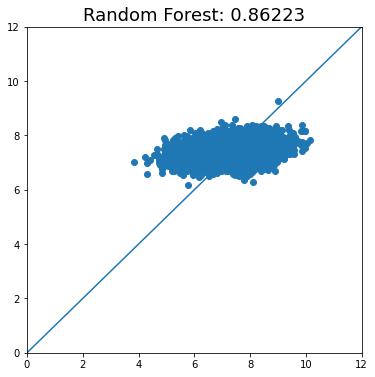

In [10]:
model_names = ["Dummy Median", "Linear",  "Lasso", "Random Forest"]

models = [
    DummyRegressor(strategy='median'),
    LinearRegression(fit_intercept=True),
    Lasso(fit_intercept=True),
    RandomForestRegressor(n_estimators=50, n_jobs=-1)]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_results(name, y_test, y_pred)

# It look like RandomForest did the best. Let's train it on all the data and make a submission!

In [11]:
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(train, target)
submission['target'] = model.predict(test)
submission.to_csv('random_forest.csv')

## Now you should save your Notebook (blue button in the upper right), and then when that's complete go to the notebook viewer and make a submission to the competition. :-)

## There's lots of room for improvement. What things can you try to get a better score?